## 객체지향 프로그래밍(Object-Oriented Programming)과 클래스

In [17]:
## 실습 1)
class Account:
    def __init__(self, number, rate=0.01):
        self.number = number
        self.balance = 0
        self.rate = rate
        
    def deposit(self, amount):  # 입금
        self.balance += amount
    
    def withdraw(self, amount):  # 출금
        if amount <= self.balance:
            self.balance -= amount
    
    def obtain_interest(self):  # 이자 획득
        self.balance += self.balance + self.rate
        
    def transfer(self, other, amount):  # 이체
         if self.balance < amount:
                print('잔고가 부족합니다. 잔액=', self.balance)
        
         else:
            self.withdraw(amount)  # withdraw 메서드 사용하기 = 송금
            other.deposit(amount)  # deposit 메서드 사용하기 = 입금
            print('이체 성공. 잔액=', self.balance)
            
        
acc1 = Account(1001)
acc2 = Account(1002)
acc3 = Account(1003)

acc1.deposit(500)
acc2.deposit(1000)

acc1.transfer(acc2, 1000)
acc2.transfer(acc1, 1000)

잔고가 부족합니다. 잔액= 500
이체 성공. 잔액= 0


## 클래스 상속(Inheritance)

### 부모 클래스의 메서드를 자식 클래스가 상속하는 것.

## 상속 관련 개념 = 메서드 오버라이딩 & 연산자 오버로딩

### 1) 메서드 오버라이딩: 상속 관계에서 상위 클래스의 메서드를 하위 클래스에서 재정의. (오버라이딩 = 적재)
#### 오버라이딩의 조건: 메서드의 이름을 동일하게 지정, 그러나 하위 클래스에서 이름만 빌리고 재정의(변경) 하는 것.
#### ex) 'Car'의 속력 올리기 메서드가 최대 150으로 지정되어있는데 승용차의 경우 속도의 제한이 필요해서 속도 올리기 함수에 변경이 있을 때 사용.

In [ ]:
class Car:
    speed = 0
    def upSpeed(self, value):   # upSpeed 함수 정의(부모 클래스)
        self.speed += value
        

class Sedan(Car):
    def upSpeed(self, value):   # upSpeed 함수 동일한 함수명으로 재정의 (자식 클래스)
        self.speed += value
        if self.speed > 150:
            self.speed = 150

### 2) 연산자 오버로딩: 객체를 연산하기 위해 필요한 연산자를 내장 타입의 형태와 동작이 유사하도록 재정의
#### 연산자 중복을 위해 두 개의 밑줄 문자가 앞 뒤로 있는 메서드를 클래스 내부에 미리 정의하는 것. (왜?: 객체 연산을 하기 위해서 연산자 정의 필요)
#### ex) 내가 클래스를 활용해서 객체끼리 수치 연산을 하고 싶으면 연산자 오버로딩을 통해 연산자를 다시 재정의 해주어야 한다는 말임.

#### 피연산자의 순서가 바뀐 경우에는 , 앞에 'r'을 붙여서 '__radd__'로 메서드를 정의한다.

#### __add__ = __radd__

### cf. Polymorphism (다형성)
#### : 상속 관계 간의 다른 클래스들의 인스턴스가 같은 멤버 함수 호출에 대해 각각 다르게 반응하도록 함
#### = 이것이 메서드 오버라이딩, 연산자 오버로딩을 가능하게 하는 기능임.
#### ex) 강아지의 'sound' = '멍멍', 고양이의 'sound' = '야옹'

## Appendix(부록)

In [90]:
a = 10
b = 'Hello World!'
print(id(a))  # id = 객체가 저장된 위치를 가리키는 포인터(주소)
print(id(b))
print(type(a))  # type = 자료형 클래스
print(type(b))

93924566987808
140463545145520
<class 'int'>
<class 'str'>


## Iterator 이터레이터: (iterable 반복가능한) 반복이 가능한 객체
### : list, dic, set, str ...

In [33]:
## 실습 문제 3: 주어진 문자열을 반대로 출력하는 이터레이터 클래스 구현


class Reverse:
    def __init__(self, data):
        self.data = data
        self.index = len(data)
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index == 0:
            raise StopIteration  # raise 예외처리 = 해당 조건이 되면 사용자가 직접 에러를 일으키는 방법.
        self.index = self.index - 1
        return self.data[self.index]
    
    
word = Reverse('Spam')
word

## generator 제네레이터: 'yield'를 사용해 데이터를 하나씩 반환하는 함수 
### = iterator 를 생성하는 함수.

### 'yield'를 활용해 데이터를 하나씩 반환하는 함수. 이터레이터보다 더 간단함. 
### 제너레이터는 함수 안에서 yield라는 키워드만 사용하면 끝입니다. 
### 그래서 제너레이터는 이터레이터보다 훨씬 간단하게 작성할 수 있습니다.

In [39]:
## 실습 문제 4: 주어진 문자열을 반대로 출력하는 제네레이터 함수 구현

def reverse(input_string):
    length = len(input_string)
    for i in range(length-1, -1, -1):
        yield input_string[i]  # yield 의 기능: yield 는 데이터를 하나씩 반환하며, 그 안에 값이 하나씩 지정된다
        
        
for i in reverse('hello'):
    print(i)

o
l
l
e
h


## 제네레이터 표현식(Generator Expression)

#### = list comprehension 과 비슷한데, () 를 사용한다. 

## First Class Object (퍼스트 클래스 객체)

### First Class 는 변수나 데이터 구조 안에 담을 수 있고, 함수 인수로 전달할 수 있고, 함수 결과로 리턴할 수 있는 객체이다.

## Nested Function: 함수 안에 있는 함수. 중첩함수.

## Lexical Closures: 

## Decorator: '@decorator' 함수를 적용할 함수 바로 위에 붙여준다.

In [ ]:
@decorator
def introduce(name):
    print('Hi, my name is', name)

## Callable: 함수처럼 행동하는 객체를 Callable 함수로 판단할 수 있다. (모든 함수는 객체이지만, 모든 객체는 함수가 아님. 함수가 객체 안에 포함되어있는 것)

In [ ]:
class Adder:
    .
    .
    .
    def __call__(self, x):
        return self.n + x

# Numpy (넘파이)

In [43]:
import numpy as np

In [47]:
## Numpy 의 가장 기초적인 객체 = Array(배열, 요소들의 테이블)
import numpy as np
np.ndarray


a = np.array([2,3,4])
a

array([2, 3, 4])

In [48]:
a.dtype  # 데이터 타입

dtype('int64')

In [82]:
b = np.array([1.2, 3.4, 5.6])
b.dtype
print(b)

[1.2 3.4 5.6]


In [51]:
np.zeros((3,4))  # 행 3, 열 4 인 배열 생성

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [54]:
np.ones((2,3,4), dtype = np.int16)  #(배열 개수, 행, 열)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [81]:
# 실습 문제 1) 5, 5, 2d array 만들기

import numpy as np
x = np.ones(((5,5)))
print('Original array')
print(x)
print('1 on the border and 0 inside in the array')
x[1:-1, 1:-1] = 0
print(x)

Original array
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
1 on the border and 0 inside in the array
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


In [85]:
## 실습 문제 2) 1과 반대로 만들기

import numpy as np
x = np.ones((3,3))
print('Original Array')
print(x)

Original Array
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


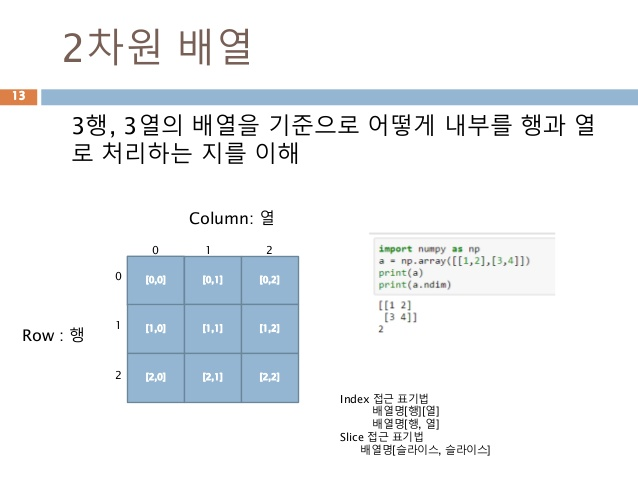

In [55]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [59]:
b = np.arange(12).reshape(4,3)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [61]:
c = np.arange(24).reshape(2,3,4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [ ]:
## 배열이 너무 큰 경우, 중간은 자동으로 생략되어 표현된다.

## Array Indexing

In [ ]:
## 단일요소 인덱싱
x = np.arange(10)
x[2]
x[-2]

## 차원보다 작은 인덱싱


In [65]:
x.shape = (2,5)
x[1,3]

8

In [67]:
a = np.array([1,2,3],
            [4,5,6],
            [7,8,9])

print(a) #??????????????????? # 모르겠어요

ValueError: only 2 non-keyword arguments accepted

In [68]:
x = np.arange(10)
x[2:5]

array([2, 3, 4])

In [72]:
y = np.arange(35).reshape(5,7)
y[1:5:2, ::3] #??????????????????? # 모르겠어요

array([[ 7, 10, 13],
       [21, 24, 27]])

In [74]:
a = np.array([1, 2], [3, 4], [5, 6])
bool_idx = (a > 2)
print(bool_idx)
print(a[bool_idx])

ValueError: only 2 non-keyword arguments accepted

## Array Slicing

In [ ]:
## Numpy 의 array 는 Python list 와 유사한 Slicing 문법 사용

## 단, shallow copy 를 사용함

## Shape Manipulation

In [75]:
b = 10 * np.random.random((3,4))
print(b)
a = np.floor(b)  # 내림 함수
print(a)

[[1.01953144 7.4018838  2.43149721 8.6784126 ]
 [7.33963114 4.73899163 0.56562982 0.12386267]
 [0.78125978 8.11126425 9.33036488 3.81899405]]
[[1. 7. 2. 8.]
 [7. 4. 0. 0.]
 [0. 8. 9. 3.]]


In [77]:
# resize() 메서드는 배열 자체의 행과 열을 수정한다.
a.resize((2,6))
a

# -1 로 지정된 경우는 자동으로 계산한다.  ???? 무슨 말이야..
a.reshape(3, -1)
a

array([[1., 7., 2., 8., 7., 4.],
       [0., 0., 0., 8., 9., 3.]])

In [ ]:
# np.vstack() --> 1 axis 에 쌓기

# np.hstack() --> 2 axis 에 쌓기

In [ ]:
# np.vsplit() --> 1 axis 기준 나누기

# np.hsplit() --> 2 axis 기준 나누기

## Basic Operations

In [84]:
## 산술연산은 기본적으로 elementwise 로 적용.
## 연산결과는 새로운 배열 생성 후 채워진다.

x = np.array([1,2])
y = np.array([3,4])
x + y

array([4, 6])

In [89]:
## 많은 단항 연산이 필요한 경우 ndarray 클래스의 메서드를 사용한다.

b = np.arange(12).reshape(3,4)  # reshape() = 
b
b.sum(axis=0)
b.min(axis=1)
b.cumsum(axis=1)  #cumsum = ?

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

In [ ]:
## Broadcating: 서로 같은 모양의 항을 요구하는 이항 연산에 대해서 한 항의 값을 반대의 크기에 맞게 확장하는 것.
## 브로드캐스트(broadcast)는 스칼라 값이 연산하려는 배열의 형상으로 확대된 후, 연산이 적용되는 기능을 뜻한다.


In [ ]:
np.expand_dims(a,0).shape

In [ ]:
## 실습 문제 4) 연립 일차 방정식 풀기

def linear_system